In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

from src.decision_tree import Decision_tree
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None 

### DECISION TREE ON RANDOM_OVER_SAMPLE DATAFRAME

-----


In [2]:
df_over = pd.read_pickle('data/generated_data/cardio_processed_over.pkl')
df_over.head()

,age_category,BMI_category,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,sex_F,sex_M,is_smoking_NO,is_smoking_YES,TenYearCHD
0,2.0,0.25,0,0,0,0,1.071429,0.15,-0.224138,0.722222,0.450931,1.000000,0.142857,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,0.5,0.25,0,0,1,0,-0.928571,0.00,-0.379310,1.462963,0.883744,-0.200000,-0.214286,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
2,0.5,0.00,0,0,0,0,-0.214286,0.50,0.275862,-0.462963,-1.012582,0.866667,1.142857,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,0.5,0.25,0,0,1,0,0.071429,1.00,-0.017241,1.092593,0.579768,-0.466667,1.142857,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
4,2.0,0.25,0,0,0,0,1.071429,1.50,0.120690,0.296296,0.209361,-0.333333,-0.071429,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


In [3]:
response_var = 'TenYearCHD'

In [4]:
decision_tree_over = Decision_tree(df_over, response_var)

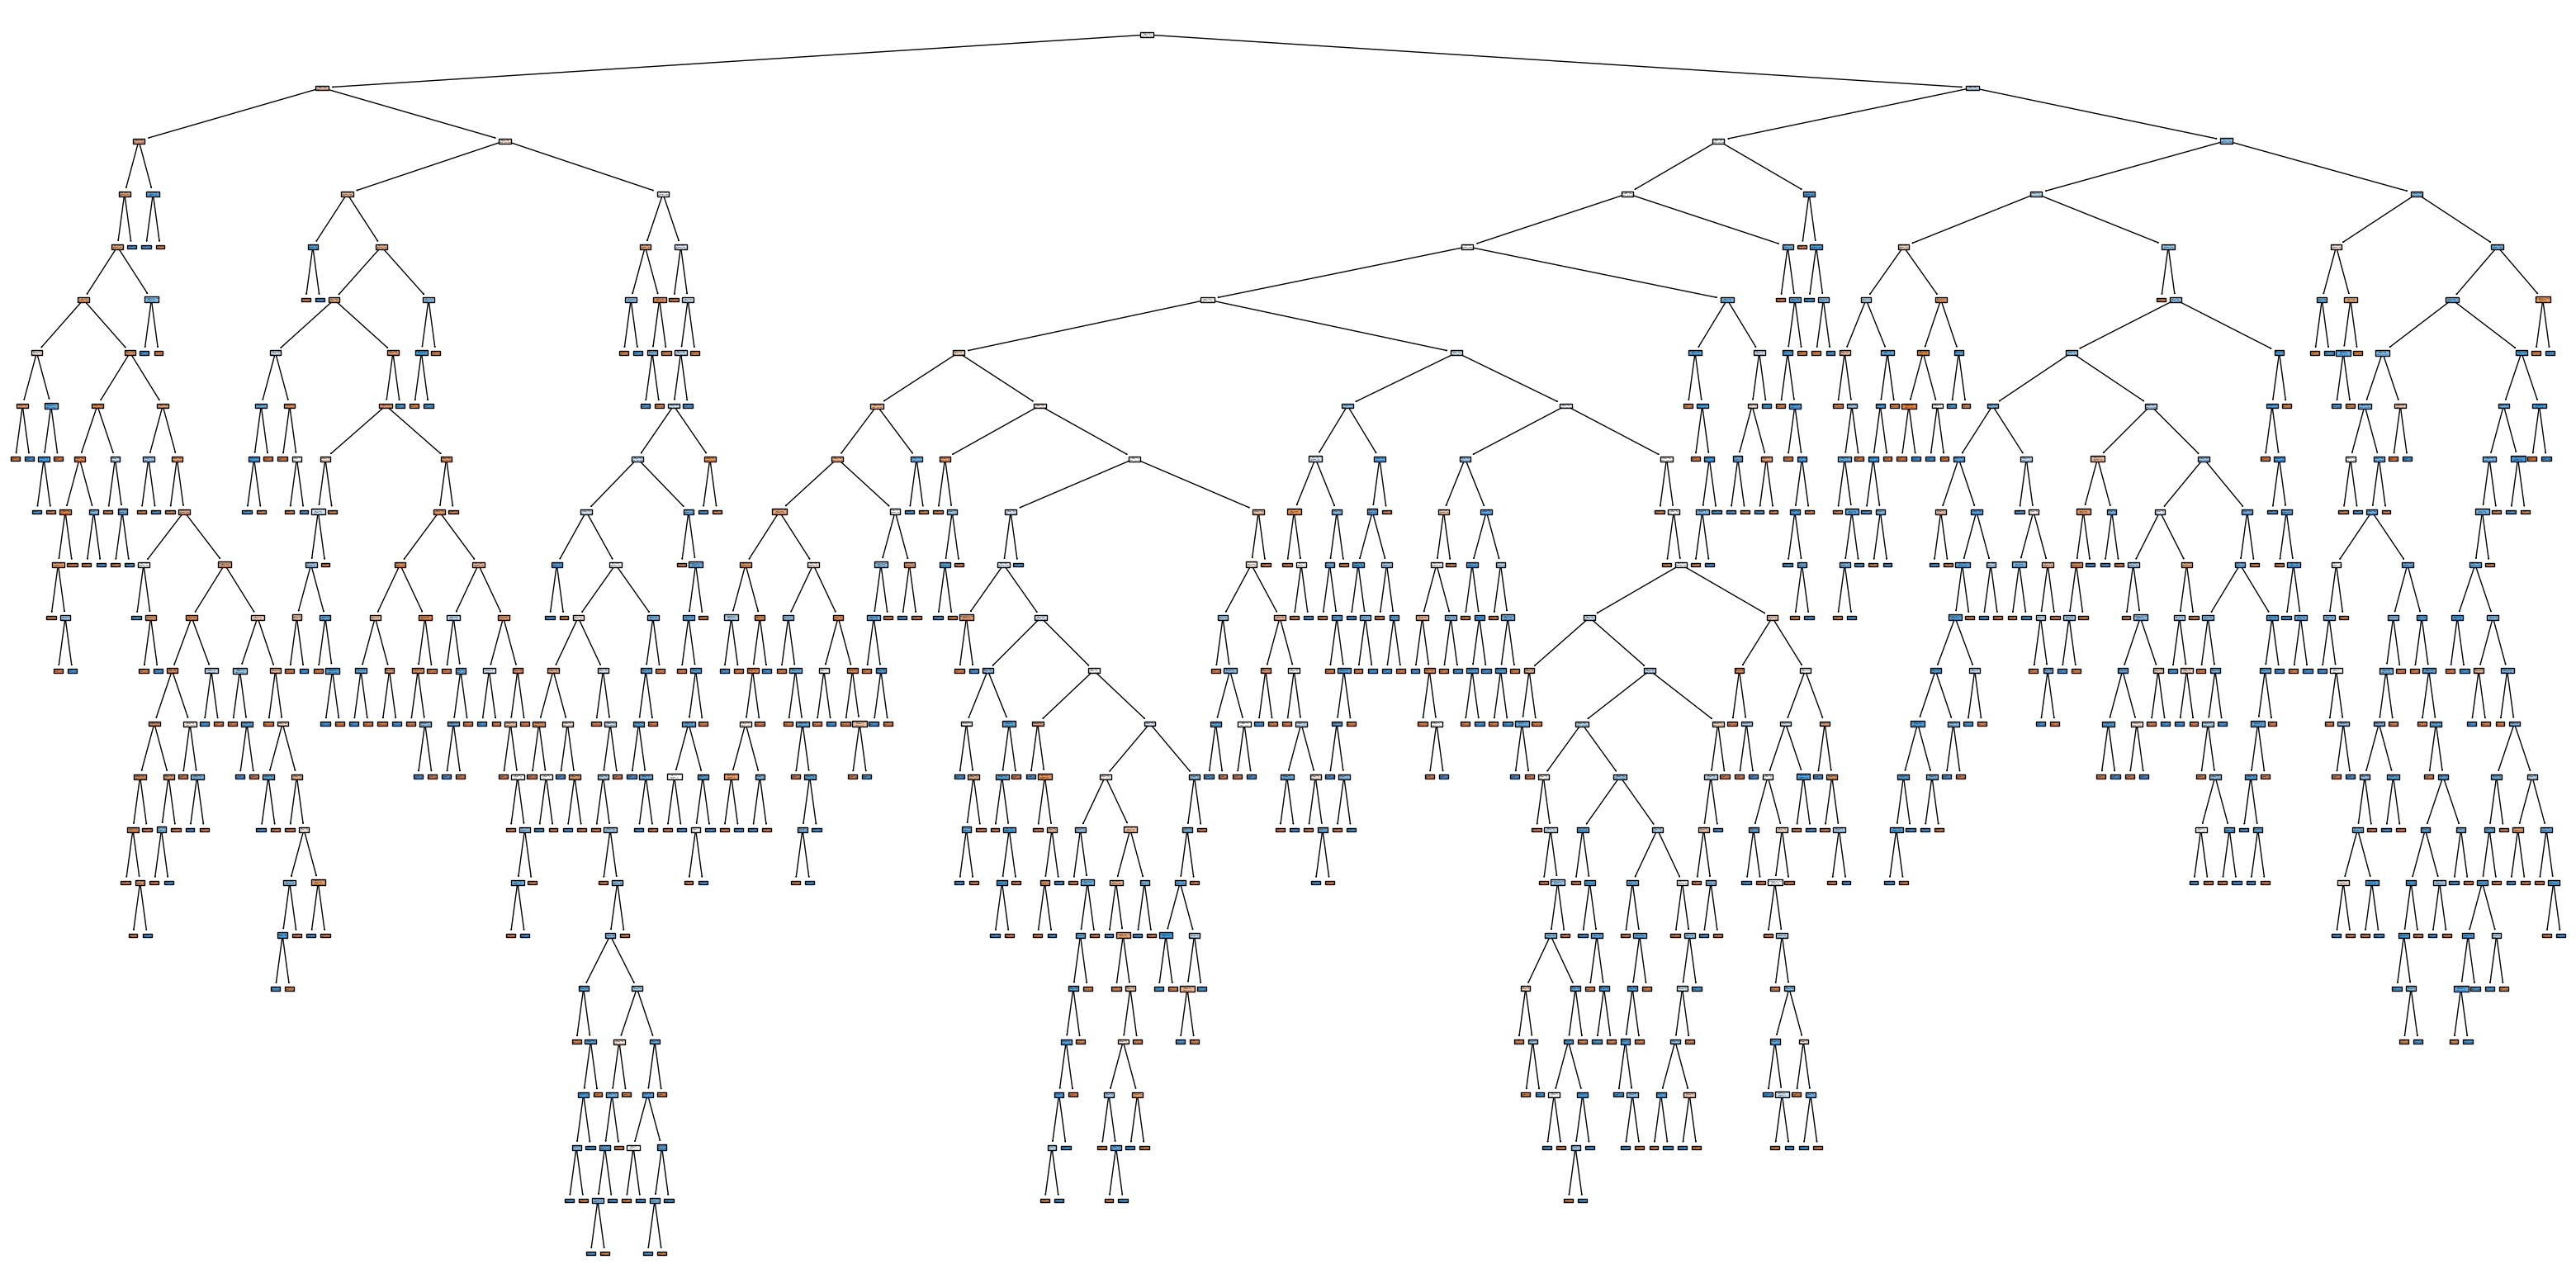

{'max_features': 4.58257569495584, 'max_depth': 23}

In [5]:
decision_tree_over.fit_model()

In [6]:
decision_tree_over.get_metrics('OVER Decision Tree')

,accuracy,precision,recall,f1,kappa,set,model
0,0.902778,0.841785,0.985748,0.908096,0.806252,test,OVER Decision Tree
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,OVER Decision Tree


In [7]:
param_over = {"max_depth": [9, 10, 11, 12], 
        "max_features": [2, 3, 4, 5],
        "min_samples_split": [50, 100, 150],
        "min_samples_leaf": [10, 20, 50]} 

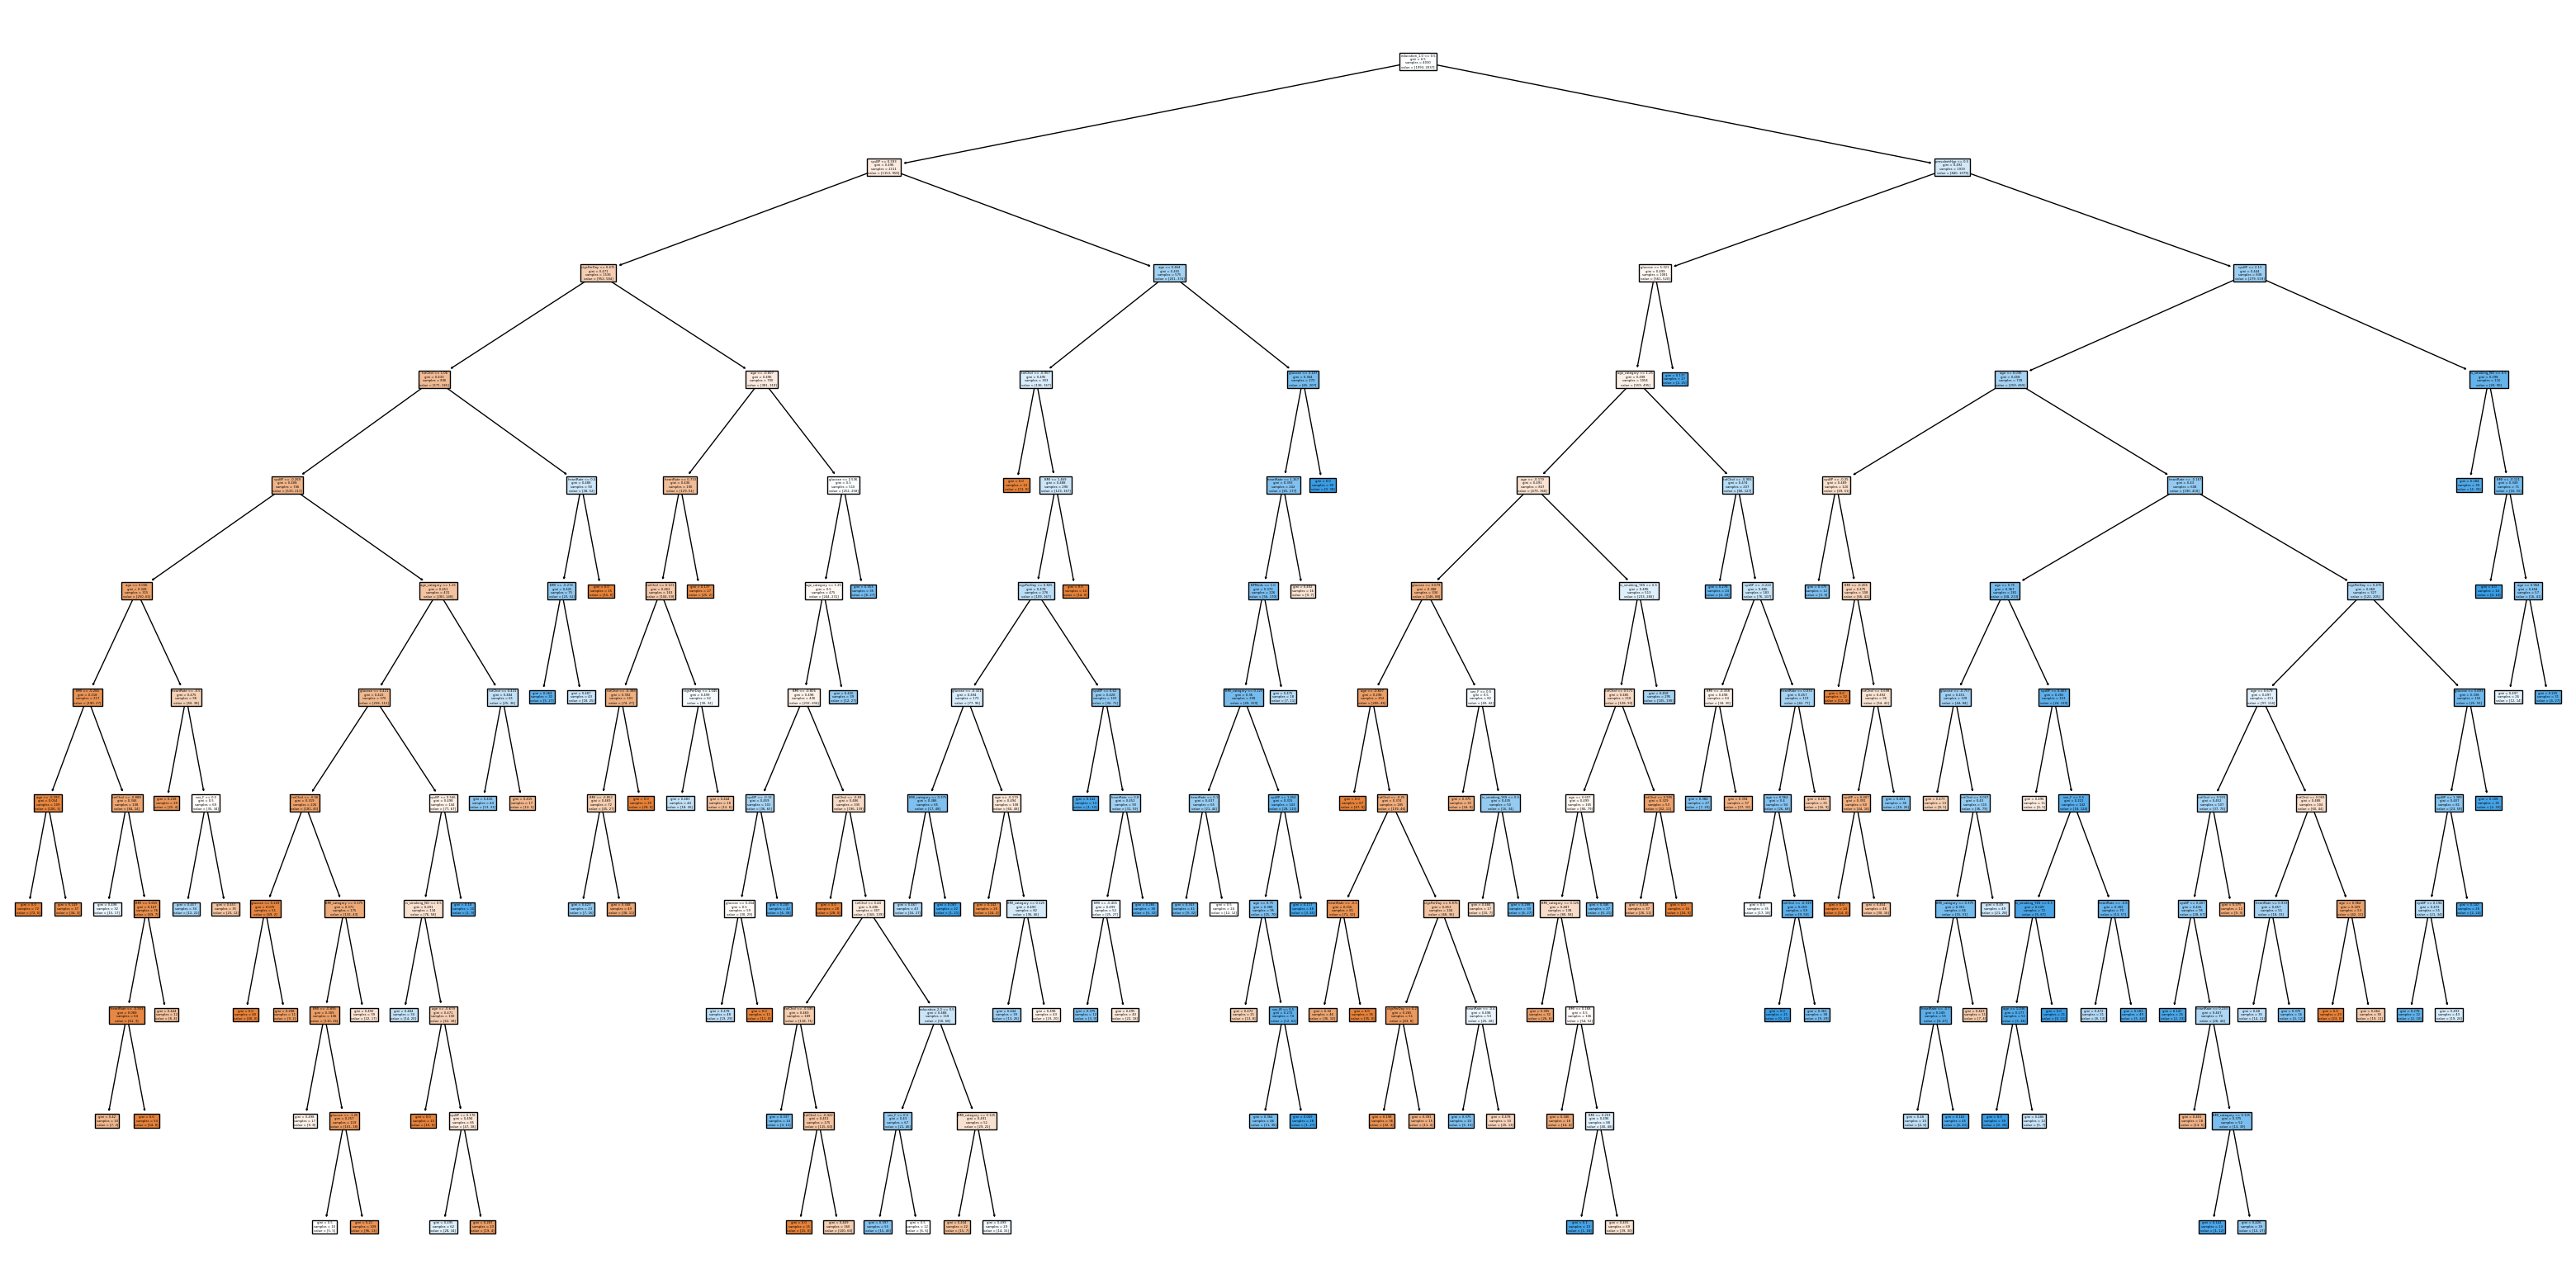

DecisionTreeClassifier(max_depth=11, max_features=5, min_samples_leaf=10,
                       min_samples_split=50, random_state=42)

In [8]:
decision_tree_over.define_best_model(param_over)

In [9]:
dt_over_results = decision_tree_over.apply_best_model('OVER Decision Tree Best')
dt_over_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.710648,0.681915,0.761283,0.719416,0.422590,test,OVER Decision Tree Best
1,0.756079,0.738246,0.801669,0.768651,0.511638,train,OVER Decision Tree Best


In [10]:
decision_tree_over.create_df_feature_importance()

,predictor,importance
6,age,0.187226
8,totChol,0.160516
9,sysBP,0.155104
12,glucose,0.092813
10,BMI,0.084668
11,heartRate,0.080106
7,cigsPerDay,0.048581
4,prevalentHyp,0.044961
13,education_1.0,0.032544
0,age_category,0.031549


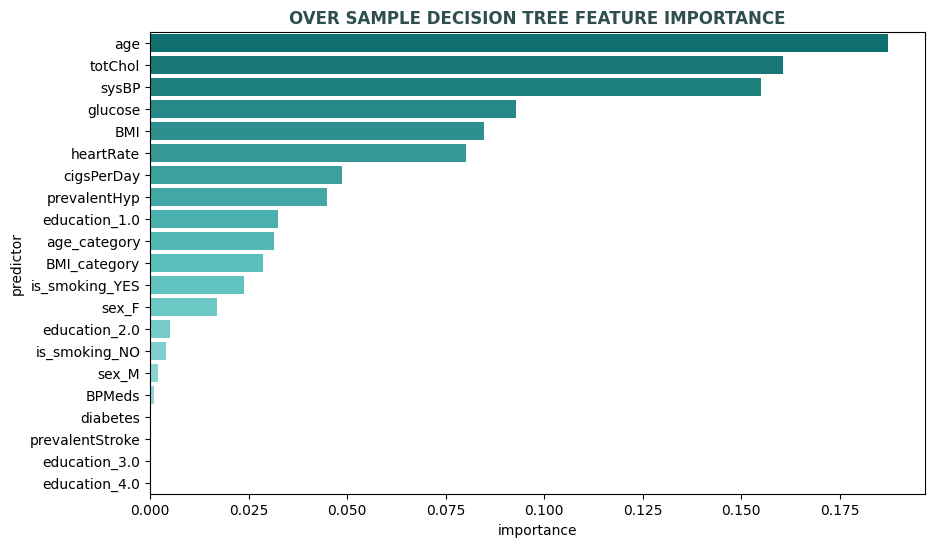

In [11]:
decision_tree_over.create_barplot_feature_importance('OVER SAMPLE')

### DECISION TREE ON TOKEN_SMOTE DATAFRAME

-----


In [12]:
df_ts = pd.read_pickle('data/generated_data/cardio_processed_ts.pkl')
df_ts.head()

,age_category,BMI_category,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,sex_F,sex_M,is_smoking_NO,is_smoking_YES
0,2.0,0.25,0,0,0,0,1.071429,0.15,-0.224138,0.722222,0.450931,1.000000,0.142857,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.5,0.25,0,0,1,0,-0.928571,0.00,-0.379310,1.462963,0.883744,-0.200000,-0.214286,0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.5,0.00,0,0,0,0,-0.214286,0.50,0.275862,-0.462963,-1.012582,0.866667,1.142857,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.5,0.25,0,0,1,0,0.071429,1.00,-0.017241,1.092593,0.579768,-0.466667,1.142857,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2.0,0.25,0,0,0,0,1.071429,1.50,0.120690,0.296296,0.209361,-0.333333,-0.071429,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [13]:
decision_tree_ts = Decision_tree(df_ts, response_var)

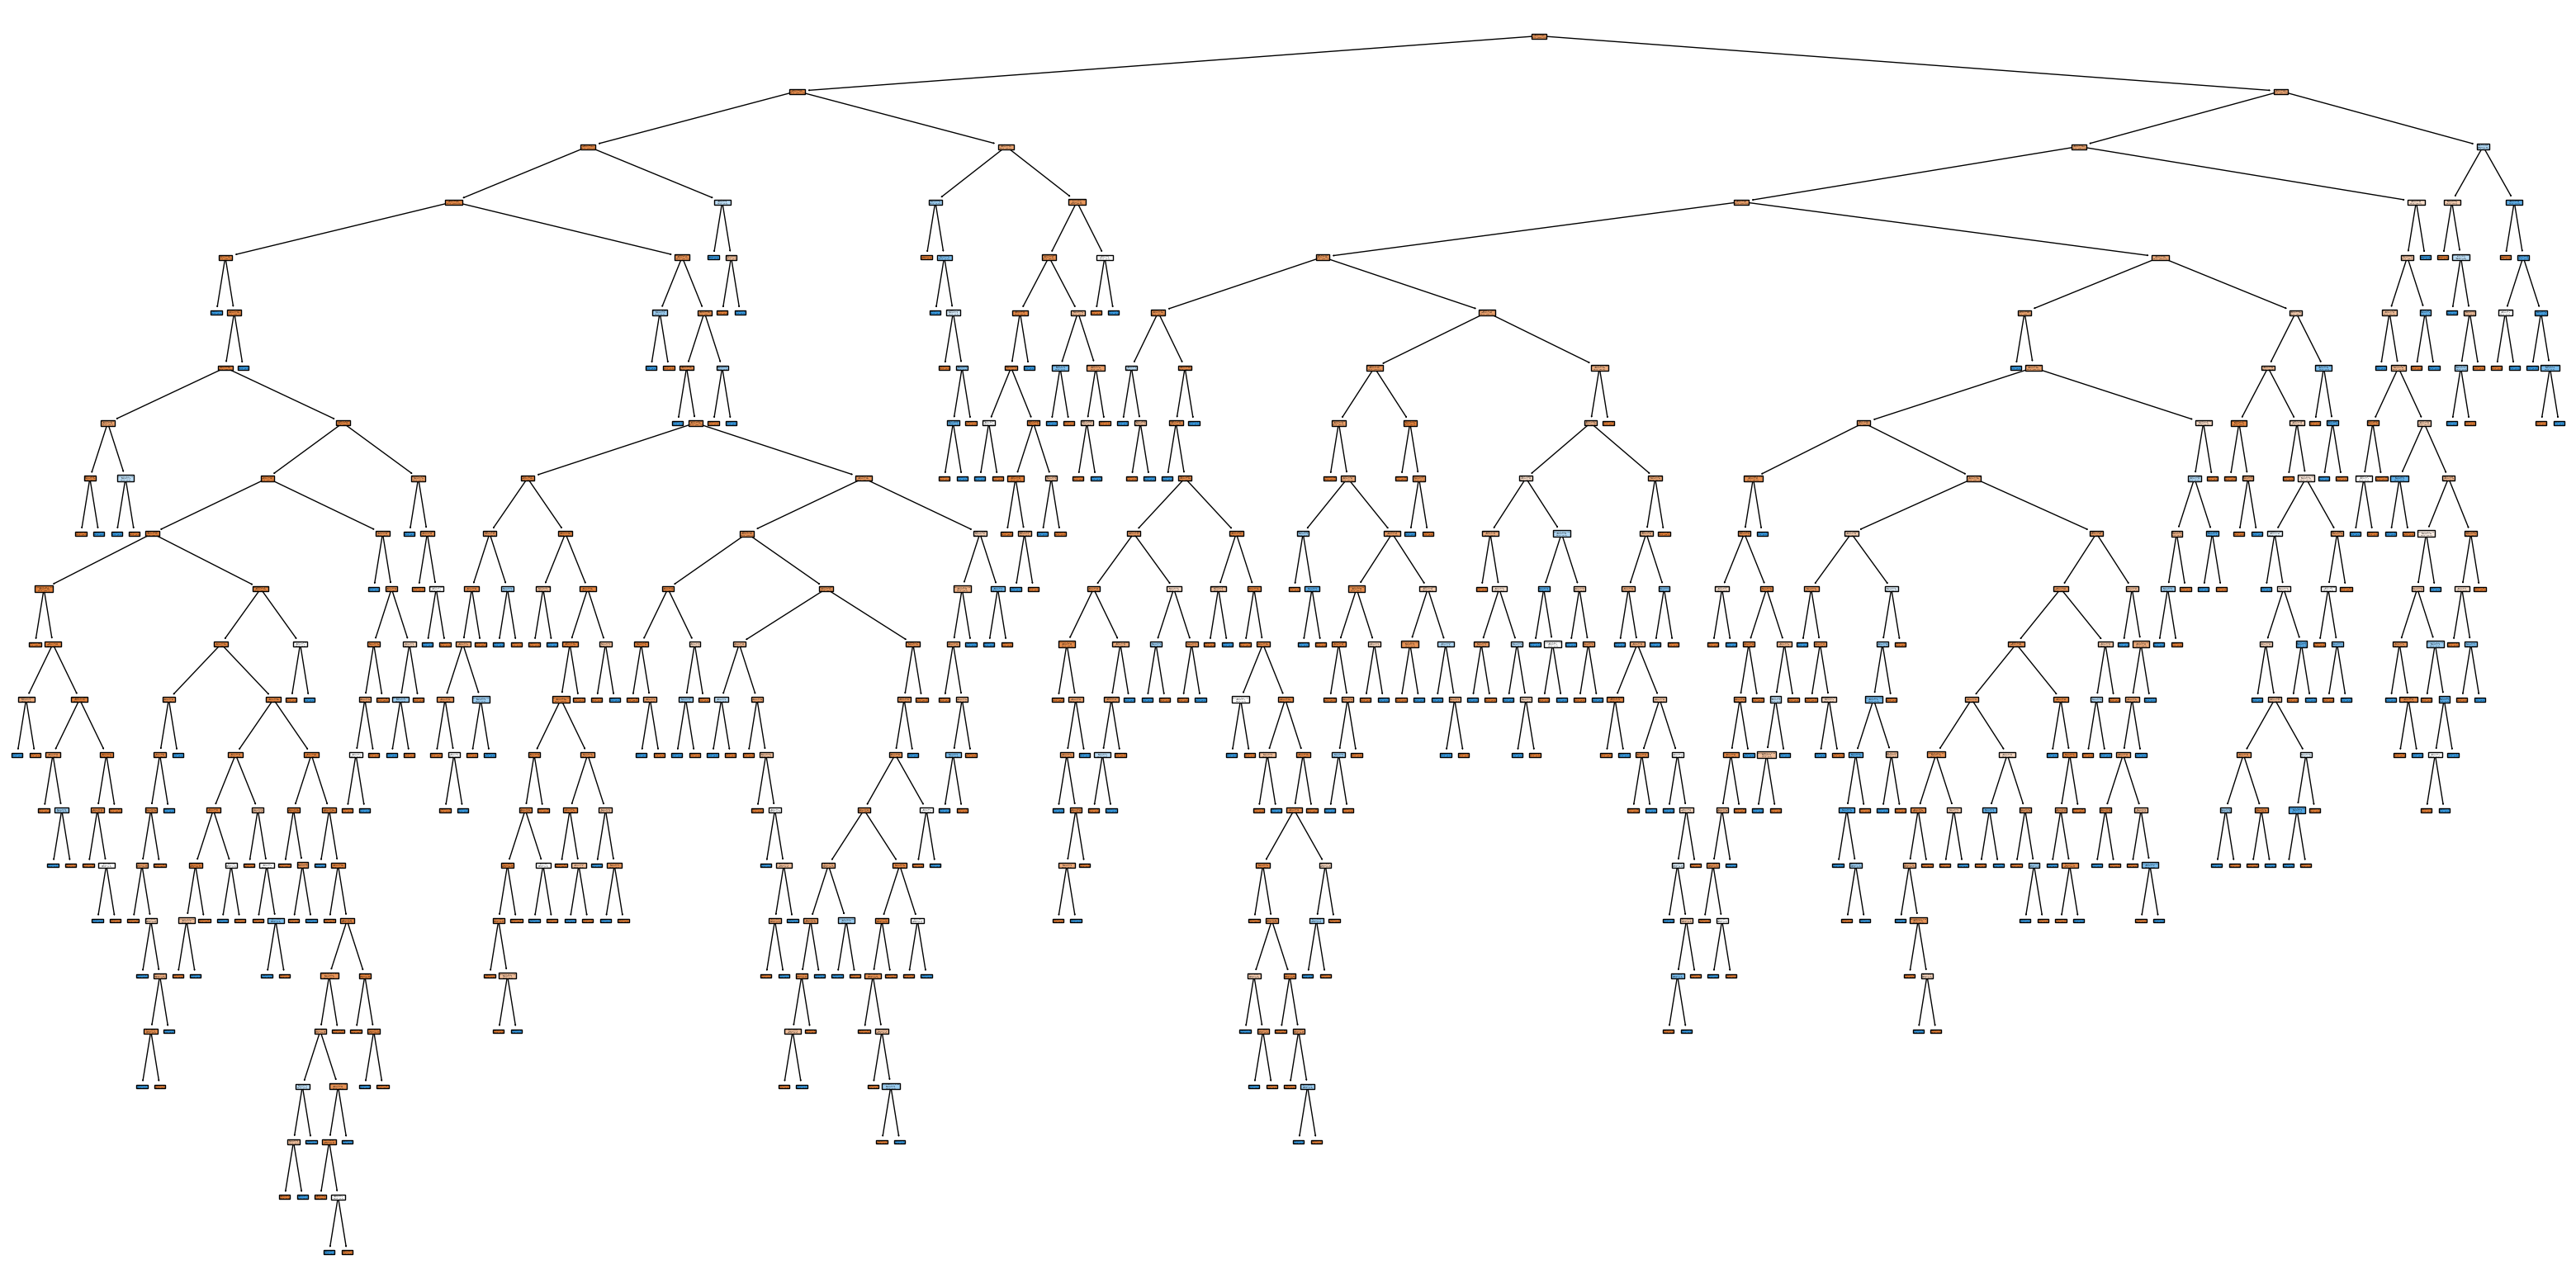

{'max_features': 4.58257569495584, 'max_depth': 22}

In [14]:
decision_tree_ts.fit_model()

In [15]:
decision_tree_ts.get_metrics('TS Decision Tree')

,accuracy,precision,recall,f1,kappa,set,model
0,0.765978,0.256831,0.315436,0.283133,0.145046,test,TS Decision Tree
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,TS Decision Tree


In [16]:
param_ts = {"max_depth": [10, 11, 12], 
        "max_features": [3, 4, 5],
        "min_samples_split": [50, 100, 150],
        "min_samples_leaf": [10, 20, 50]} 

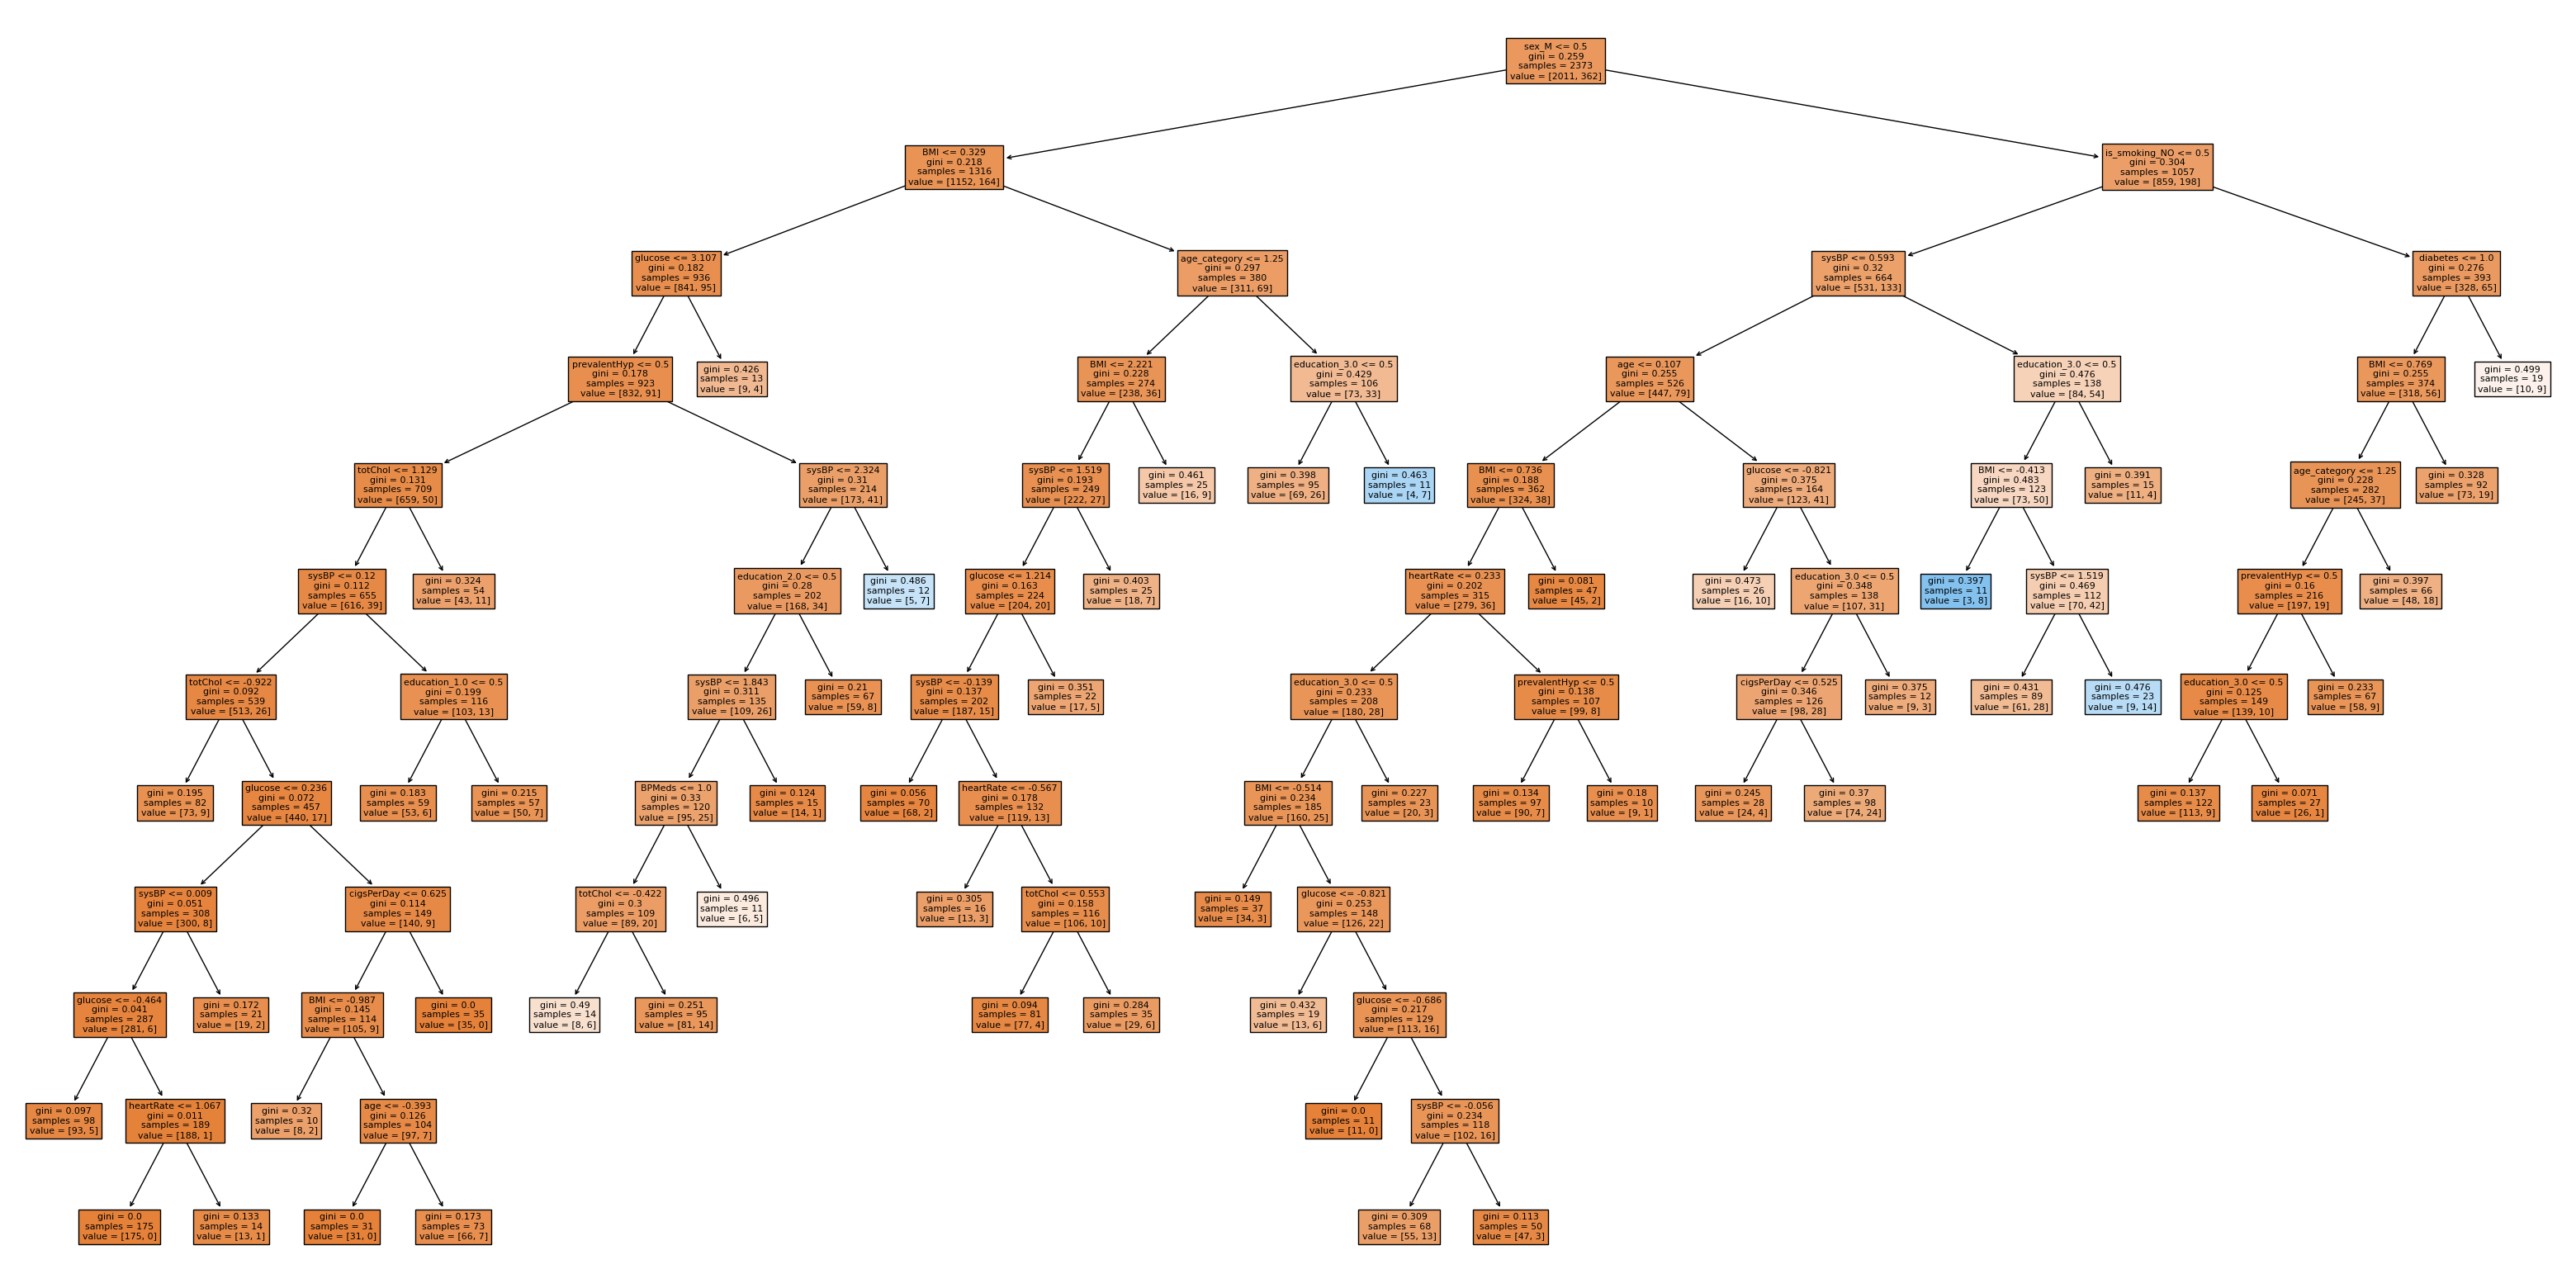

DecisionTreeClassifier(max_depth=11, max_features=3, min_samples_leaf=10,
                       min_samples_split=100, random_state=42)

In [17]:
decision_tree_ts.define_best_model(param_ts)

In [18]:
dt_ts_results = decision_tree_ts.apply_best_model('TS Decision Tree Best')
dt_ts_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.852507,0.473684,0.060403,0.107143,0.076540,test,TS Decision Tree Best
1,0.853772,0.631579,0.099448,0.171838,0.135976,train,TS Decision Tree Best


In [19]:
decision_tree_ts.create_df_feature_importance()

,predictor,importance
9,sysBP,0.303129
10,BMI,0.132148
0,age_category,0.104457
8,totChol,0.067934
12,glucose,0.065477
4,prevalentHyp,0.065286
6,age,0.064012
18,sex_M,0.057314
5,diabetes,0.047190
15,education_3.0,0.039713


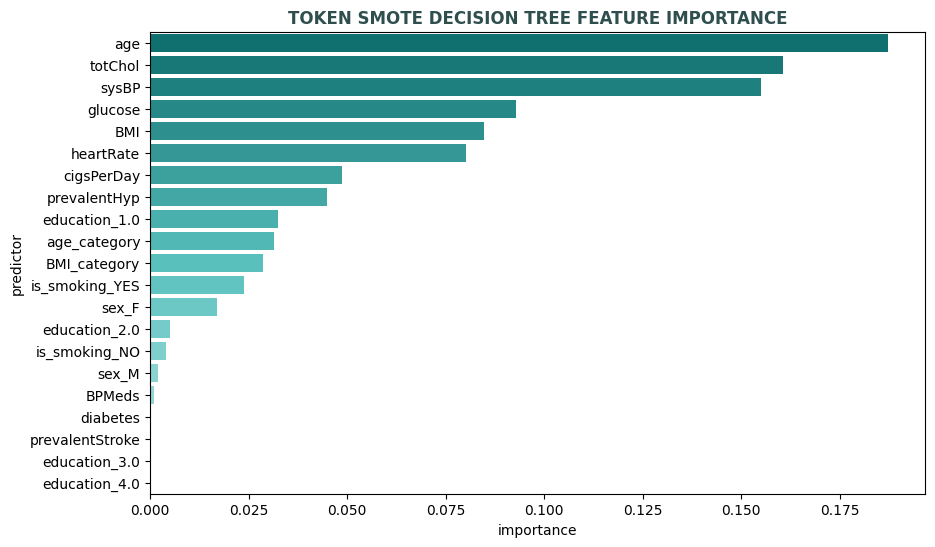

In [20]:
decision_tree_over.create_barplot_feature_importance('token smote')

### SAVE RESULTS

-----


In [21]:
lr_results = pd.read_pickle('data/generated_data/LR_results.pkl')
lr_results.head()

,accuracy,precision,recall,f1,kappa,set,model
0,0.695602,0.681193,0.705463,0.693116,0.391347,test,OVER Logistic Regression
1,0.654094,0.656448,0.662248,0.659335,0.308039,train,OVER Logistic Regression
0,0.860374,0.684211,0.087248,0.154762,0.125791,test,TS Logistic Regression
1,0.856300,0.744186,0.088398,0.158025,0.129837,train,TS Logistic Regression


As with the Logistic Regression model, we have obtained satisfactory metrics in the Random_Over_Sample Dataframe by employing the decision tree method. However, the kappa value is low, so we will explore alternative approaches. Conversely, the Token_Smote dataframe showed inferior results compared to the Logistic Regression model in the same Dataframe. As a result, we reject these findings.

In [22]:
# We compare the results by concatenating them with Logistic Regression metrics.

all_results = pd.concat([lr_results, dt_over_results, dt_ts_results], axis = 0)
all_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.695602,0.681193,0.705463,0.693116,0.391347,test,OVER Logistic Regression
1,0.654094,0.656448,0.662248,0.659335,0.308039,train,OVER Logistic Regression
0,0.860374,0.684211,0.087248,0.154762,0.125791,test,TS Logistic Regression
1,0.856300,0.744186,0.088398,0.158025,0.129837,train,TS Logistic Regression
0,0.710648,0.681915,0.761283,0.719416,0.422590,test,OVER Decision Tree Best
1,0.756079,0.738246,0.801669,0.768651,0.511638,train,OVER Decision Tree Best
0,0.852507,0.473684,0.060403,0.107143,0.076540,test,TS Decision Tree Best
1,0.853772,0.631579,0.099448,0.171838,0.135976,train,TS Decision Tree Best


In [23]:
all_results.to_pickle('data/generated_data/LR_DT_results.pkl')